In [1]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import quad, odeint
import matplotlib.pyplot as plt

In [8]:
gDM = 2.

In [9]:
def rho_DM(T, MDM):
        if T < MDM/30.0:            return 0.0
        else:            return gDM/(2*np.pi**2)*T**4*quad(lambda E: E**2*(E**2-(MDM/T)**2)**0.5/(np.exp(E)+1.) ,MDM/T,100,epsabs=1e-12,epsrel = 1e-12)[0]

def p_DM(T,MDM):
        if T < MDM/30.0:            return 0.0
        else:            return gDM/(6*np.pi**2)*T**4*quad(lambda E: (E**2-(MDM/T)**2)**1.5/(np.exp(E)+1.) ,MDM/T,100,epsabs=1e-12,epsrel = 1e-12)[0]
def drho_DMdT(T,MDM):
        if T < MDM/30.0:    return 0.0
        else:            return gDM/(2*np.pi**2)*T**3*quad(lambda E: 0.25*E**3*(E**2-(MDM/T)**2)**0.5*np.cosh(E/2.0)**-2 ,MDM/T,100,epsabs=1e-12,epsrel = 1e-12)[0]


In [10]:
drho_DMdT(10, 1)

2302.073728344876

In [11]:
P_int      =interp1d(np.loadtxt("QED/QED_P_int.cvs")[:,0],np.loadtxt("QED/QED_P_int.cvs")[:,1]+np.loadtxt("QED/QED_P_int.cvs")[:,2],bounds_error=False,fill_value=0.0,kind='linear')
dP_intdT   =interp1d(np.loadtxt("QED/QED_dP_intdT.cvs")[:,0],np.loadtxt("QED/QED_dP_intdT.cvs")[:,1]+np.loadtxt("QED/QED_dP_intdT.cvs")[:,2],bounds_error=False,fill_value=0.0,kind='linear')
d2P_intdT2 =interp1d(np.loadtxt("QED/QED_d2P_intdT2.cvs")[:,0],np.loadtxt("QED/QED_d2P_intdT2.cvs")[:,1]+np.loadtxt("QED/QED_d2P_intdT2.cvs")[:,2],bounds_error=False,fill_value=0.0,kind='linear')


In [12]:

# All in MeV Units!
GF  = 1.1663787e-5*1e-6 #in MeV^{-2}
me  = 0.511
Mpl = 1.22091e19*1e3


# Conversion factor to convert MeV^-1 into seconds
FAC = 1./(6.58212e-22)

# Left and Right nu-e couplings as relevant for E < 10 MeV. From the EW review of the PDG
geL, geR, gmuL, gmuR = 0.727, 0.233, -0.273, 0.233

# 

In [111]:
# Thermodynamics
def rho_nu(T):  return 2 * 7./8. * np.pi**2/30. * T**4

def rho_gam(T): return 2 * np.pi**2/30. * T**4

def rho_phi(T): return np.pi**2/30. * T**4

def rho_e(T):
    if T < me/30.0:        return 0.0
    else:        return 4./(2*np.pi**2)*T**4*quad(lambda E: E**2*(E**2-(me/T)**2)**0.5/(np.exp(E)+1.) ,me/T,100,epsabs=1e-12,epsrel = 1e-12)[0]

def p_e(T):
    if T < me/30.0:        return 0.0
    else:        return 4./(6*np.pi**2)*T**4*quad(lambda E: (E**2-(me/T)**2)**1.5/(np.exp(E)+1.) ,me/T,100,epsabs=1e-12,epsrel = 1e-12)[0]

# Derivatives
def drho_nudT(T):     return 4*rho_nu(T)/T

def drho_gamdT(T):    return 4*rho_gam(T)/T

def drho_phidT(T):    return 4*rho_phi(T)/T

def drho_edT(T):
    if T < me/30.0:  return 0.0
    else:        return 4./(2*np.pi**2)*T**3*quad(lambda E: 0.25*E**3*(E**2-(me/T)**2)**0.5*np.cosh(E/2.0)**-2 ,me/T,100,epsabs=1e-12,epsrel = 1e-12)[0]

# Rho tot
def rho_tot(T_gam, T_nue, T_numu, T_phi):
    return rho_gam(T_gam) + rho_e(T_gam) + rho_phi(T_phi) + rho_nu(T_nue) + 2*rho_nu(T_numu) - P_int(T_gam) + T_gam*dP_intdT(T_gam)

# P tot
def p_tot(T_gam, T_nue, T_numu):
    return  1./3. * rho_gam(T_gam) + p_e(T_gam) + 1./3. * rho_nu(T_nue) + 1./3. * 2*rho_nu(T_numu) + P_int(T_gam)

# Hubble
def Hubble(T_gam, T_nue, T_numu, T_phi):
    return FAC * (rho_tot(T_gam, T_nue, T_numu, T_phi)*8*np.pi/(3*Mpl**2))**0.5

# Neff Definition
def Neff_func(T_gam, T_nue, T_numu, T_phi):
    return 8./7.*(11./4.)**(4./3.)*(rho_nu(T_nue) + 2*rho_nu(T_numu) + rho_phi(T_phi)) / rho_gam(T_gam)


# Suppression of the rates as a result of a non-negligible electron mass
f_nue_s  = interp1d(np.loadtxt("SM_Rates/nue_scatt.dat")[:,0],np.loadtxt("SM_Rates/nue_scatt.dat")[:,1],kind='linear')
f_numu_s = interp1d(np.loadtxt("SM_Rates/numu_scatt.dat")[:,0],np.loadtxt("SM_Rates/numu_scatt.dat")[:,1],kind='linear')
f_nue_a  = interp1d(np.loadtxt("SM_Rates/nue_ann.dat")[:,0],np.loadtxt("SM_Rates/nue_ann.dat")[:,1],kind='linear')
f_numu_a = interp1d(np.loadtxt("SM_Rates/numu_ann.dat")[:,0],np.loadtxt("SM_Rates/numu_ann.dat")[:,1],kind='linear')

##Uncomment in order to remove the effect of m_e in the rates.
##f_nue_s, f_numu_s, f_nue_a, f_numu_a   = lambda T : 1, lambda T : 1, lambda T : 1, lambda T : 1

def Ffunc_nue_e(T1,T2):
    return 32* 0.884 *(T1**9 - T2**9) * f_nue_a(T1)  + 56 * 0.829 * f_nue_s(T1)  *T1**4*T2**4*(T1-T2)
def Ffunc_numu_e(T1,T2):
    return 32* 0.884 *(T1**9 - T2**9) * f_numu_a(T1) + 56 * 0.829 * f_numu_s(T1) *T1**4*T2**4*(T1-T2)
def Ffunc(T1,T2):
    return 32* 0.884 *(T1**9 - T2**9) + 56* 0.829 *T1**4*T2**4*(T1-T2)

# Energy Transfer Rates
def DeltaRho_nue(T_gam,T_nue,T_numu):
    return FAC * GF**2/np.pi**5 * ( 4* (geL**2 + geR**2) * Ffunc_nue_e(T_gam,T_nue)  + 2*Ffunc(T_numu,T_nue) )
def DeltaRho_numu(T_gam,T_nue,T_numu):
    return FAC * GF**2/np.pi**5 * ( 4* (gmuL**2 + gmuR**2) * Ffunc_numu_e(T_gam,T_numu) -   Ffunc(T_numu,T_nue) )

In [192]:
Mphi = 5.
lam = 10**-6. #10**(-6)
mnu = 10**(-7) #0.1 ev

In [193]:
def DeltaRho_phi(T_nu, T_phi):
    return (lam**4/np.pi**5)*( (T_nu**5)*np.log((2*T_nu)/mnu) - (T_phi**5)*np.log((2*T_phi)/mnu))   

def DeltaRho_nu(T_gam, T_nu):
    return DeltaRho_nue(T_gam, T_nu, T_nu) + 2*DeltaRho_numu(T_gam, T_nu, T_nu)

In [194]:
[DeltaRho_phi(8, .9), DeltaRho_nu(8,8.5)]

[2.0227459593614955e-21, -7382194.220667215]

In [195]:
Hubble(1,1,1,1)

0.7056989047539582

In [196]:
# Temperature Evolution Equations
def dTnu_dt(T_gam, T_nu, T_phi):
    return - T_nu*Hubble(T_gam, T_nu, T_nu, T_phi) + (T_nu/(4*rho_nu(T_nu)))*( DeltaRho_nu(T_gam, T_nu) - DeltaRho_phi(T_nu, T_phi) )

def dTgam_dt(T_gam, T_nu ,T_phi):
    return -(Hubble(T_gam, T_nu, T_nu, T_phi)*(4*rho_gam(T_gam) + 3*(rho_e(T_gam) + p_e(T_gam)) + 3 * T_gam * dP_intdT(T_gam)) + DeltaRho_nu(T_gam, T_nu) )/( drho_gamdT(T_gam) + drho_edT(T_gam)  + T_gam * d2P_intdT2(T_gam) )

def dTphi_dt(T_gam, T_nu, T_phi):
    return - T_phi*Hubble(T_gam, T_nu, T_nu, T_phi) + (T_phi/(4*rho_phi(T_phi)))*(DeltaRho_phi(T_nu, T_phi)) 


def dT_totdt(vec, t):
    T_gam, T_nu, T_phi = vec
    return [dTgam_dt(T_gam, T_nu,T_phi), dTnu_dt(T_gam,T_nu,T_phi),dTphi_dt(T_gam,T_nu,T_phi)]

In [197]:
[ dTnu_dt(1, .9, .8), dTgam_dt(1, .9, .8), dTphi_dt(1, .9, .8)] 

[-0.5391098530418946, -0.6281816740140256, -0.5032764138014975]

In [198]:
dT_totdt([1, .9 ,.8], 0)

[-0.6281816740140256, -0.5391098530418946, -0.5032764138014975]

In [199]:
def dT_totdt(vec, t):
    T_gam, T_nu, T_phi = vec
    return [dTgam_dt(T_gam, T_nu,T_phi), dTnu_dt(T_gam,T_nu,T_phi),dTphi_dt(T_gam,T_nu,T_phi)]


#Start the integration at a common temperature of 20 MeV, which corresponds to t ~ 2*10^{-3} s
T0 = 20.0
t0 = 1./(2*Hubble(T0,T0,T0,T0))

# Finish the calculation at t = 5*10^4 seconds, which will correspond to T ~ 5*10^{-3} MeV
t_max = 5e4

In [200]:
tvec = np.logspace(np.log10(t0), np.log10(t_max), num=300)

In [201]:
sol = odeint(dT_totdt, [T0,T0,T0], tvec, rtol = 1e-8, atol= 1e-8)

In [202]:
round(Neff_func(sol[-1,0], sol[-1,1], sol[-1,1], sol[-1,2]), 5)

3.63948

In [188]:
round(Neff_func(sol[-1,0], sol[-1,1], sol[-1,1], sol[-1, 2]), 5)

3.63948

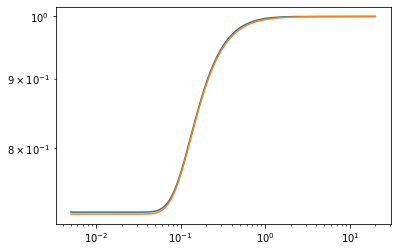

In [189]:
plt.loglog(sol[:,0], sol[:,1]/sol[:,0])
plt.loglog(sol[:,0], sol[:,2]/sol[:,0])

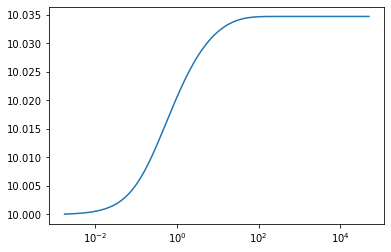

In [184]:
plt.plot(tvec, sol[:,1]/sol[:,2])
plt.xscale('log')

In [127]:
t0

0.001766198541123033

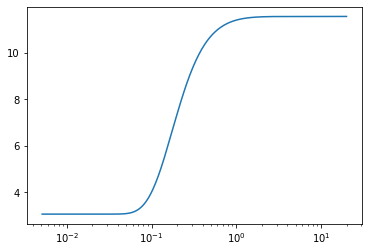

In [185]:
plt.semilogx(sol[:,0], Neff_func(sol[:,0], sol[:,1], sol[:,1], sol[:,2]))

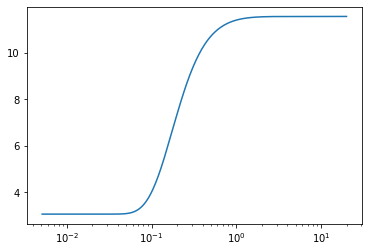

In [159]:
plt.semilogx( sol[:,0], Neff_func(sol[:,0], sol[:,1], sol[:,1], sol[:,2]))

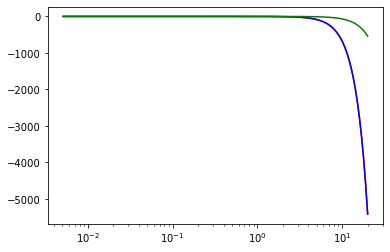

In [173]:
tgam = []
tnu = []
tphi = []

for i in range(len(tvec)):
    tnu.append(dTnu_dt(sol[i,0], sol[i,1], sol[i,2]))

for i in range(len(tvec)):
    tgam.append(dTgam_dt(sol[i,0], sol[i,1], sol[i,2])) 

for i in range(len(tvec)):
    tphi.append(dTphi_dt(sol[i,0], sol[i,1], sol[i,2]))
    
plt.semilogx( sol[:,0], tgam, 'r')
plt.semilogx( sol[:,0], tnu, 'b')
plt.semilogx( sol[:,0], tphi, 'g')

In [190]:
1./(2*Hubble(T0,T0,T0,T0))

0.001766198541123033

In [191]:
1./(2*Hubble(T0,T0,T0,T0/10))

0.0018466102506347723